# PCA

https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

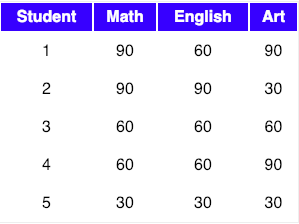

## By hand

In [39]:
import numpy as np

In [117]:
A = np.array([[90,60,90], 
              [90,90,30],
              [60,60,60],
              [60,60,90],
              [30,30,30]])

A

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]])

Let us get the mean of the matrix, as we need to center the data.

In [118]:
mean = A.mean(0)
mean

array([66., 60., 60.])

In [119]:
A_centered = A - mean
A_centered

array([[ 24.,   0.,  30.],
       [ 24.,  30., -30.],
       [ -6.,   0.,   0.],
       [ -6.,   0.,  30.],
       [-36., -30., -30.]])

Now we compute the covariance matrix.

The formula for the covariance of two variables $X$ and $Y$ is:

$$cov(X,Y) = \frac{\sum_i^n(X_i -\mu_X)(Y_i - \mu_Y)}{n-1}$$

In [162]:
# Calculate X = math, y = english
# Centered so mean is 0
# Cov(math, english)
# n = 5
((24*30)+((-36)*(-30)))/4

450.0

In [120]:
# Compute covariance matrix
B = np.cov(A_centered.T)
B

array([[630., 450., 225.],
       [450., 450.,   0.],
       [225.,   0., 900.]])

In [123]:
# Check variances along diagonal
print(np.var(A_centered.T, axis=1, ddof=1))

[630. 450. 900.]


We now compute eigenvalues and eigenvectors.

Let $A$ be a square matrix, $v$ a vector and $\lambda $ a scalar that satisfies $Av = \lambda v$, then $\lambda$ is called eigenvalue associated with eigenvector $v$ of $A$.
The eigenvalues of $A$ are roots of the characteristic equation
$$ |A - \lambda I | = 0 $$

We need to solve

$$ \left| \left[{\begin{array}{cc}
   630 & 450 & 225 \\
   450 & 450 & 0 \\
   225 & 0 & 900 \\
  \end{array}} \right] -
  \lambda 
  \left[{\begin{array}{cc}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 1 \\
  \end{array}} \right] \right| = 0
 $$
 
 $$ \left| \left[{\begin{array}{cc}
   630 - \lambda & 450 & 225 \\
   450 & 450-\lambda & 0 \\
   225 & 0 & 900-\lambda \\
  \end{array}} \right] \right| = 0
 $$

$ (630 - \lambda) * (450 -\lambda)*(900 - \lambda) -
  450 * (450 * (900 - \lambda)) +
  225 * (-225 * (450 - \lambda)) = 0$

$ (283500 - 630 \lambda - 450 \lambda + \lambda^2)*(900 - \lambda) - 450 * (405000 - 450 \lambda) 
+ 225 * (-101250 + 225 \lambda) = 0$

$ (283500 -1080 \lambda + \lambda^2)*(900 - \lambda) - 450 * (405000 - 450 \lambda) 
+ 225 * (-101250 + 225 \lambda) = 0$

$ 255150000 - 283500 \lambda - 972000 \lambda + 1080 \lambda^2 + 900 \lambda^2 - \lambda^3
- 182250000 + 202500 \lambda - 22781250 + 50625 \lambda = 0 $

$ - \lambda^3 + 1980 \lambda^2 - 1002375 \lambda + 50118750 = 0 $

Solving gives us three values for $\lambda$,

$ \lambda_1 = 56.025$

$ \lambda_2 = 786.39$

$ \lambda_3 = 1137.587$

Now we compute the corresponding eigenvectors, by solving
$$ (A - \lambda I) . v = 0 $$

For $ \lambda_1 = 56.025$
$$ \left( \left[{\begin{array}{cc}
   630 & 450 & 225 \\
   450 & 450 & 0 \\
   225 & 0 & 900 \\
  \end{array}} \right] -
  \left[{\begin{array}{cc}
   \lambda_1 & 0 & 0 \\
   0 & \lambda_1 & 0 \\
   0 & 0 & \lambda_1 \\
  \end{array}} \right] \right) \cdot
  \left[{\begin{array}{cc}
   v_1  \\
   v_2  \\
   v_3 \\
  \end{array}} \right] = 0
 $$
 
$$ \left( \left[{\begin{array}{cc}
   630 & 450 & 225 \\
   450 & 450 & 0 \\
   225 & 0 & 900 \\
  \end{array}} \right] -
  \left[{\begin{array}{cc}
   56.025 & 0 & 0 \\
   0 & 56.025 & 0 \\
   0 & 0 & 56.025 \\
  \end{array}} \right] \right) \cdot
  \left[{\begin{array}{cc}
   v_1  \\
   v_2  \\
   v_3 \\
  \end{array}} \right] = 0
$$
 
$$  \left[{\begin{array}{cc}
   573.975 & 450 & 225 \\
   450 & 393.975 & 0 \\
   225 & 0 & 843.975 \\
  \end{array}} \right] \cdot
  \left[{\begin{array}{cc}
   v_1  \\
   v_2  \\
   v_3 \\
  \end{array}} \right] = 0
$$

We have a set of simultaneous equations to solve: 

$ 573.975 v_1 + 450 v_2 + 225 v_3 = 0 $

$ 450 v_1 + 393.975 v_2 = 0 $

$ 225 v_1 + 843.975 v_3 = 0 $

We also want the eigenvalues to have norm 1, so we have

$ \sqrt{(v_1^2 + v_2^2 + v_3^2)} = 1 $

## Using Numpy eig

In [168]:
A = np.array([[90,60,90], 
              [90,90,30],
              [60,60,60],
              [60,60,90],
              [30,30,30]])
A

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]])

In [169]:
# Normalize
A_centered = A - A.mean(0)
A_centered

array([[ 24.,   0.,  30.],
       [ 24.,  30., -30.],
       [ -6.,   0.,   0.],
       [ -6.,   0.,  30.],
       [-36., -30., -30.]])

In [170]:
# Covariance Matrix
cov_mat = np.cov(A_centered.T)
cov_mat

array([[630., 450., 225.],
       [450., 450.,   0.],
       [225.,   0., 900.]])

In [171]:
# Get eigenvalues/eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [172]:
eig_values

array([  56.02457535, 1137.5874413 ,  786.38798335])

In [173]:
eig_vectors

array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]])

In [174]:
# test

# Av 
cov_mat.dot(eig_vectors[:,0])

array([ 36.34817855, -41.51700671,  -9.69025867])

In [175]:
#lambda v
eig_vectors[:, 0] * eig_values[0]

array([ 36.34817855, -41.51700671,  -9.69025867])

In [176]:
# Sort eigenvalues

# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eig_values)[::-1]

# Sort 
eigenvectors_sorted = eig_vectors[:, e_indices]
eigenvectors_sorted

array([[-0.65580225, -0.3859988 ,  0.6487899 ],
       [-0.4291978 , -0.51636642, -0.74104991],
       [-0.62105769,  0.7644414 , -0.17296443]])

In [180]:
# Reproject
eigenvectors_sorted[:,0:2]

array([[-0.65580225, -0.3859988 ],
       [-0.4291978 , -0.51636642],
       [-0.62105769,  0.7644414 ]])

## Using Numpy SVD

In [ ]:
A = np.array([[90,60,90], 
              [90,90,30],
              [60,60,60],
              [60,60,90],
              [30,30,30]])

A

In [20]:
A_centered = A - A.mean(axis = 0)
A_centered

array([[ 24.,   0.,  30.],
       [ 24.,  30., -30.],
       [ -6.,   0.,   0.],
       [ -6.,   0.,  30.],
       [-36., -30., -30.]])

In [21]:
U, s, Vt = np.linalg.svd(A_centered)
U

array([[-0.5095298 , -0.24372323,  0.69352605,  0.06935477,  0.44180303],
       [-0.14799893,  0.85028115, -0.09830431,  0.2799761 ,  0.40873944],
       [ 0.05833131, -0.04129417, -0.26003754, -0.77313055,  0.57405739],
       [-0.21787322, -0.45019409, -0.60666165,  0.49059743,  0.37567585],
       [ 0.81707063, -0.11506966,  0.27147745,  0.2799761 ,  0.40873944]])

In [22]:
s

array([67.4562804 , 56.08522028, 14.96991321])

In [23]:
Vt

array([[-0.65580225, -0.4291978 , -0.62105769],
       [ 0.3859988 ,  0.51636642, -0.7644414 ],
       [ 0.6487899 , -0.74104991, -0.17296443]])

In [110]:
c1 = Vt.T[:,0]
c1

array([-0.65580225, -0.4291978 , -0.62105769])

In [111]:
c2 = Vt.T[:,1]
c2

array([ 0.3859988 ,  0.51636642, -0.7644414 ])

In [143]:
W2 = Vt.T[:,:2]
W2

array([[-0.65580225,  0.3859988 ],
       [-0.4291978 ,  0.51636642],
       [-0.62105769, -0.7644414 ]])

In [144]:
A_proj = A_centered.dot(W2)
A_proj

array([[-34.37098481, -13.66927088],
       [ -9.98345733,  47.68820559],
       [  3.93481353,  -2.31599277],
       [-14.69691716, -25.24923474],
       [ 55.11654576,  -6.45370719]])

## Using sklearn PCA

In [112]:
from sklearn.decomposition import PCA

In [113]:
A = np.array([[90,60,90], 
              [90,90,30],
              [60,60,60],
              [60,60,90],
              [30,30,30]])

A

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]])

In [114]:
pca = PCA(n_components=2)
pca.fit_transform(A)

array([[-34.37098481, -13.66927088],
       [ -9.98345733,  47.68820559],
       [  3.93481353,  -2.31599277],
       [-14.69691716, -25.24923474],
       [ 55.11654576,  -6.45370719]])

In [115]:
pca.components_

array([[-0.65580225, -0.4291978 , -0.62105769],
       [ 0.3859988 ,  0.51636642, -0.7644414 ]])